In [56]:
import os 
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

import torch
import torchvision.models as models


from dataset import FTDataset
from model import FTModel

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
model = models.resnet18()
for n, p in model.named_parameters():
    print("Name:", n, ", Param", p.shape)
    print(""+"-"*50)

Name: conv1.weight Param torch.Size([64, 3, 7, 7])
--------------------------------------------------
Name: bn1.weight Param torch.Size([64])
--------------------------------------------------
Name: bn1.bias Param torch.Size([64])
--------------------------------------------------
Name: layer1.0.conv1.weight Param torch.Size([64, 64, 3, 3])
--------------------------------------------------
Name: layer1.0.bn1.weight Param torch.Size([64])
--------------------------------------------------
Name: layer1.0.bn1.bias Param torch.Size([64])
--------------------------------------------------
Name: layer1.0.conv2.weight Param torch.Size([64, 64, 3, 3])
--------------------------------------------------
Name: layer1.0.bn2.weight Param torch.Size([64])
--------------------------------------------------
Name: layer1.0.bn2.bias Param torch.Size([64])
--------------------------------------------------
Name: layer1.1.conv1.weight Param torch.Size([64, 64, 3, 3])
-------------------------------------

In [16]:
state = torch.load("resnet18-f37072fd.pth")

In [18]:
for name, param in state.items():
    if "conv" in name:
        param_new = param.

Name: conv1.weight , Param torch.Size([64, 3, 7, 7])
--------------------------------------------------
Name: bn1.running_mean , Param torch.Size([64])
--------------------------------------------------
Name: bn1.running_var , Param torch.Size([64])
--------------------------------------------------
Name: bn1.weight , Param torch.Size([64])
--------------------------------------------------
Name: bn1.bias , Param torch.Size([64])
--------------------------------------------------
Name: layer1.0.conv1.weight , Param torch.Size([64, 64, 3, 3])
--------------------------------------------------
Name: layer1.0.bn1.running_mean , Param torch.Size([64])
--------------------------------------------------
Name: layer1.0.bn1.running_var , Param torch.Size([64])
--------------------------------------------------
Name: layer1.0.bn1.weight , Param torch.Size([64])
--------------------------------------------------
Name: layer1.0.bn1.bias , Param torch.Size([64])
-----------------------------------

In [33]:
root_dir = "croppedData"
class_list = os.listdir(root_dir)

len_ = {i:0 for i in range(801)}
for i, c in enumerate(class_list):
    img_path = f"{root_dir}/{c}"
    id = int(c.strip().replace("_cropped", "")[1:]) - 1
    index = id if id < 800 else 800
    len_[index] += len(os.listdir(img_path))

In [34]:
len_

{0: 114,
 1: 115,
 2: 119,
 3: 136,
 4: 133,
 5: 43,
 6: 84,
 7: 130,
 8: 124,
 9: 123,
 10: 120,
 11: 117,
 12: 116,
 13: 131,
 14: 123,
 15: 131,
 16: 134,
 17: 127,
 18: 124,
 19: 127,
 20: 106,
 21: 129,
 22: 122,
 23: 121,
 24: 112,
 25: 118,
 26: 121,
 27: 94,
 28: 121,
 29: 123,
 30: 113,
 31: 114,
 32: 114,
 33: 128,
 34: 128,
 35: 125,
 36: 78,
 37: 120,
 38: 122,
 39: 127,
 40: 119,
 41: 131,
 42: 131,
 43: 120,
 44: 97,
 45: 124,
 46: 138,
 47: 128,
 48: 122,
 49: 117,
 50: 124,
 51: 123,
 52: 116,
 53: 125,
 54: 133,
 55: 113,
 56: 119,
 57: 132,
 58: 120,
 59: 123,
 60: 121,
 61: 102,
 62: 76,
 63: 113,
 64: 116,
 65: 122,
 66: 112,
 67: 100,
 68: 126,
 69: 132,
 70: 129,
 71: 121,
 72: 127,
 73: 125,
 74: 123,
 75: 131,
 76: 126,
 77: 28,
 78: 96,
 79: 119,
 80: 52,
 81: 98,
 82: 130,
 83: 111,
 84: 95,
 85: 130,
 86: 118,
 87: 130,
 88: 116,
 89: 69,
 90: 80,
 91: 108,
 92: 124,
 93: 137,
 94: 74,
 95: 124,
 96: 126,
 97: 122,
 98: 121,
 99: 113,
 100: 106,
 101: 80,
 10

In [34]:
val_dset = FTDataset(
    root_dir="../croppedData", 
    test_ratio=0.2,
    gray_scale=False,
    train_isNull=False,
    pretrain=True, # train using 4839 classes
    mode='test'
)
val_loader = torch.utils.data.DataLoader(
    dataset=val_dset,
    batch_size=10000,
    shuffle=False
)

In [35]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model = FTModel(num_class=4839, model_type="resnet18")
model.load_state_dict(torch.load("../ckpt/resnet18_4839_pretrain/best_acc.pth"))
model.to(device)
model.eval()

FTModel(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runni

In [57]:
def val_special(model, val_loader):
    model.eval()
    labels, preds = [], []
    metadata = [[0,0] for _ in range(801)] # correct, total

    with torch.no_grad():
        for i, batch in enumerate(val_loader, start=1):
            img = batch['img'].to(device)
            label = batch['label']
            logits = model(img)
            pred = logits.argmax(dim=1).cpu()

            for l, p in zip(label, pred):
                # 800~4039 belongs to NULL
                l = l if l < 800 else 800 
                p = p if p < 800 else 800                
                metadata[l][1] += 1 
                if l == p: metadata[l][0] += 1

            labels.append(label)
            preds.append(pred)
            print(f"{i}/{len(val_loader)}" + " "*20, end="\r")
        
        labels, preds = torch.cat(labels, dim=0), torch.cat(preds, dim=0)
        f1 = f1_score(labels, preds, average="macro")
        
        return f1, metadata

f1, metadata = val_special(model, val_loader)

In [58]:
f1

0.9197881414566427

In [61]:
metadata

[[10, 11],
 [11, 11],
 [25, 27],
 [8, 10],
 [10, 11],
 [11, 12],
 [9, 10],
 [9, 10],
 [9, 10],
 [11, 12],
 [20, 24],
 [9, 10],
 [11, 11],
 [10, 10],
 [12, 12],
 [10, 12],
 [9, 10],
 [12, 12],
 [11, 12],
 [9, 10],
 [21, 26],
 [10, 10],
 [10, 11],
 [12, 12],
 [12, 12],
 [10, 11],
 [15, 18],
 [9, 10],
 [24, 25],
 [24, 27],
 [11, 11],
 [11, 11],
 [23, 26],
 [22, 24],
 [10, 10],
 [12, 12],
 [10, 10],
 [10, 11],
 [11, 11],
 [10, 10],
 [12, 12],
 [10, 10],
 [11, 11],
 [11, 11],
 [11, 11],
 [11, 11],
 [9, 11],
 [11, 11],
 [10, 10],
 [24, 26],
 [9, 10],
 [9, 10],
 [10, 10],
 [10, 11],
 [10, 12],
 [11, 11],
 [21, 25],
 [11, 11],
 [10, 11],
 [18, 24],
 [9, 10],
 [11, 11],
 [21, 25],
 [20, 24],
 [10, 11],
 [11, 11],
 [10, 10],
 [11, 12],
 [6, 12],
 [17, 24],
 [8, 10],
 [10, 10],
 [9, 10],
 [7, 10],
 [10, 10],
 [10, 11],
 [11, 12],
 [12, 12],
 [10, 11],
 [11, 11],
 [22, 24],
 [12, 12],
 [8, 10],
 [20, 21],
 [8, 11],
 [10, 10],
 [10, 12],
 [1, 4],
 [22, 25],
 [10, 10],
 [10, 10],
 [10, 10],
 [10, 11

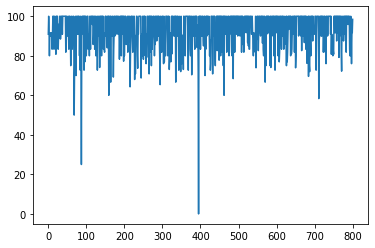

In [36]:
metadata = [[0,0] for _ in range(4839)]    
trange = tqdm(val_loader)
with torch.no_grad():
    for batch in trange:
        img = batch['img'].to(device)
        label = batch['label']
        logits = model(img)
        pred = logits.argmax(1).cpu()
        trange.set_postfix_str(f"Accuracy: {(pred==label).sum().item()/len(label)*100}%")
        
        for l, p in zip(label, pred):
            metadata[l][1] += 1
            if l == p: metadata[l][0] += 1

100%|██████████| 7/7 [00:19<00:00,  2.80s/it, Accuracy: 90.39164490861619%]


In [40]:
for i, (correct, total) in enumerate(metadata):
    print(f"Class {i}, accuracy={correct/total}")

Class 0, accuracy=0.9090909090909091
Class 1, accuracy=1.0
Class 2, accuracy=0.9259259259259259
Class 3, accuracy=0.8
Class 4, accuracy=0.9090909090909091
Class 5, accuracy=0.9166666666666666
Class 6, accuracy=0.9
Class 7, accuracy=0.9
Class 8, accuracy=0.9
Class 9, accuracy=0.9166666666666666
Class 10, accuracy=0.8333333333333334
Class 11, accuracy=0.9
Class 12, accuracy=1.0
Class 13, accuracy=1.0
Class 14, accuracy=1.0
Class 15, accuracy=0.8333333333333334
Class 16, accuracy=0.9
Class 17, accuracy=1.0
Class 18, accuracy=0.9166666666666666
Class 19, accuracy=0.9
Class 20, accuracy=0.8076923076923077
Class 21, accuracy=1.0
Class 22, accuracy=0.9090909090909091
Class 23, accuracy=1.0
Class 24, accuracy=1.0
Class 25, accuracy=0.9090909090909091
Class 26, accuracy=0.8333333333333334
Class 27, accuracy=0.9
Class 28, accuracy=0.96
Class 29, accuracy=0.8888888888888888
Class 30, accuracy=1.0
Class 31, accuracy=1.0
Class 32, accuracy=0.8846153846153846
Class 33, accuracy=0.9166666666666666
Cl

Class 4681, accuracy=0.9
Class 4682, accuracy=1.0
Class 4683, accuracy=0.75
Class 4684, accuracy=1.0
Class 4685, accuracy=0.8333333333333334
Class 4686, accuracy=0.9
Class 4687, accuracy=0.9
Class 4688, accuracy=1.0
Class 4689, accuracy=0.8
Class 4690, accuracy=1.0
Class 4691, accuracy=0.9090909090909091
Class 4692, accuracy=1.0
Class 4693, accuracy=1.0
Class 4694, accuracy=0.9
Class 4695, accuracy=0.8333333333333334
Class 4696, accuracy=0.9090909090909091
Class 4697, accuracy=0.9
Class 4698, accuracy=0.6923076923076923
Class 4699, accuracy=0.8181818181818182
Class 4700, accuracy=0.7272727272727273
Class 4701, accuracy=0.7916666666666666
Class 4702, accuracy=0.9166666666666666
Class 4703, accuracy=1.0
Class 4704, accuracy=0.9
Class 4705, accuracy=1.0
Class 4706, accuracy=0.9090909090909091
Class 4707, accuracy=0.9166666666666666
Class 4708, accuracy=1.0
Class 4709, accuracy=0.6
Class 4710, accuracy=1.0
Class 4711, accuracy=1.0
Class 4712, accuracy=0.8333333333333334
Class 4713, accurac

In [71]:
val_dset.index_to_class

{0: 'c1401_cropped',
 1: 'c4696_cropped',
 2: 'c575_cropped',
 3: 'c2160_cropped',
 4: 'c2153_cropped',
 5: 'c2693_cropped',
 6: 'c2682_cropped',
 7: 'c1689_cropped',
 8: 'c2563_cropped',
 9: 'c4279_cropped',
 10: 'c548_cropped',
 11: 'c4300_cropped',
 12: 'c1447_cropped',
 13: 'c866_cropped',
 14: 'c3974_cropped',
 15: 'c4559_cropped',
 16: 'c3585_cropped',
 17: 'c2080_cropped',
 18: 'c830_cropped',
 19: 'c3296_cropped',
 20: 'c274_cropped',
 21: 'c4452_cropped',
 22: 'c2373_cropped',
 23: 'c909_cropped',
 24: 'c1678_cropped',
 25: 'c3588_cropped',
 26: 'c268_cropped',
 27: 'c3998_cropped',
 28: 'c549_cropped',
 29: 'c525_cropped',
 30: 'c855_cropped',
 31: 'c3451_cropped',
 32: 'c515_cropped',
 33: 'c214_cropped',
 34: 'c1869_cropped',
 35: 'c2837_cropped',
 36: 'c3362_cropped',
 37: 'c3043_cropped',
 38: 'c4725_cropped',
 39: 'c2403_cropped',
 40: 'c2194_cropped',
 41: 'c1289_cropped',
 42: 'c4437_cropped',
 43: 'c3504_cropped',
 44: 'c1350_cropped',
 45: 'c4822_cropped',
 46: 'c837

In [87]:
s = "{\n"
conversion = dict(val_dset.index_to_class)
for k, v in conversion.items():
    conversion[k] = int(v[1: -len("_cropped")]) - 1
    s += (f"\t{k}: {conversion[k]},\n")
s += "}"

import pickle
with open("conversion.pkl", "wb") as f:
    pickle.dump(conversion, f)

with open("conversion.txt", "w") as f:
    f.write(s)

In [83]:
conversion[2665]

1414